Bhagavantrao Patil
# Advanced Regression Assignment
The goal is to identify-
1. Which variables are significant in predicting the housing price and
2. How well those variables describe the price of a house.


In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

!pip install eli5
import eli5

import warnings
warnings.filterwarnings('ignore')


In [345]:
# Reading the data
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [346]:
# Explortory Data Analysis
print(df.shape)

(1460, 81)


In [347]:
# Explortory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [348]:
# Explortory Data Analysis
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [349]:
# The Id columns seems unnecessary hence can be dropped
df.drop('Id', axis=1, inplace=True)

In [350]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [351]:
# NA\Null value treatment
print(df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [352]:
# Lets drop the Columns having percentage of null values greater than 40 %
columnsToDrop = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columnsToDrop, axis=1, inplace=True)

# Checking the data after dropping columns
print('\nAfter dropping the columns have NA values greater than 40%')
print(df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0])


After dropping the columns have NA values greater than 40%
LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In [353]:
# Identifying the Numerical and Categorical columns
category_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Length = ", len(category_cols), "\nCategorical Columns:", category_cols)

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Length = ", len(numeric_cols), "\nNumeric Columns:", numeric_cols)

Length =  37 
Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Length =  37 
Numeric Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorc

In [354]:
# Data imputation for columns having NA\Null values.

# Model Creation for imputing numeric columns
num_imputer = SimpleImputer(strategy ='median')
# fitting the imputer on the original dataset
num_imputer.fit(df[numeric_cols])
# Imputing the missing values in train, validation and test inputs
df[numeric_cols]=num_imputer.transform(df[numeric_cols])

# Model Creation for imputing Categorical columns
cat_imputer = SimpleImputer(strategy ='most_frequent')
# fitting the imputer on the original dataset
cat_imputer.fit(df[category_cols])
# Imputing the missing values in train, validation and test inputs
df[category_cols]=cat_imputer.transform(df[category_cols])

In [355]:
# Checking the data after imputation of numeric and category columns
print('\nAfter imputing the numeric and category columns')
print(df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0])

# now data looks like i.e. no missing\NA\NaaN values


After imputing the numeric and category columns
Series([], dtype: float64)


In [356]:
# Treatment of Categorical variables

# Encode labels in categorical columns
df[category_cols]=df[category_cols].apply(LabelEncoder().fit_transform)

In [357]:
# Check the categorical variables
df[category_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [358]:
# Defining X and y
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

print('X variables:\n',X.head())
print('Target variables:\n',y.head())

X variables:
    MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0        60.0         3         65.0   8450.0       1         3            3   
1        20.0         3         80.0   9600.0       1         3            3   
2        60.0         3         68.0  11250.0       1         0            3   
3        70.0         3         60.0   9550.0       1         0            3   
4        60.0         3         84.0  14260.0       1         0            3   

   Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0          0          4          0  ...         61.0            0.0   
1          0          2          0  ...          0.0            0.0   
2          0          4          0  ...         42.0            0.0   
3          0          0          0  ...         35.0          272.0   
4          0          2          0  ...         84.0            0.0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0   

In [359]:
# Perform Train Test split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=.1, random_state=42)

In [360]:
# As the target variable values are large compared to predictor variables, performing minmax scaling on target variable
scaler = MinMaxScaler()
y_train=y_train.values.reshape(-1, 1)
y_test=y_test.values.reshape(-1, 1)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [361]:
# Check the target data
print(y_train)
print('\n',y_train.shape)

[[0.30291508]
 [0.21433601]
 [0.13941698]
 ...
 [0.11280101]
 [0.21834953]
 [0.1958879 ]]

 (1314, 1)


In [362]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 907 to 1126
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1314 non-null   float64
 1   MSZoning       1314 non-null   int64  
 2   LotFrontage    1314 non-null   float64
 3   LotArea        1314 non-null   float64
 4   Street         1314 non-null   int64  
 5   LotShape       1314 non-null   int64  
 6   LandContour    1314 non-null   int64  
 7   Utilities      1314 non-null   int64  
 8   LotConfig      1314 non-null   int64  
 9   LandSlope      1314 non-null   int64  
 10  Neighborhood   1314 non-null   int64  
 11  Condition1     1314 non-null   int64  
 12  Condition2     1314 non-null   int64  
 13  BldgType       1314 non-null   int64  
 14  HouseStyle     1314 non-null   int64  
 15  OverallQual    1314 non-null   float64
 16  OverallCond    1314 non-null   float64
 17  YearBuilt      1314 non-null   float64
 18  YearRemodAd

In [363]:
# Lets perform model selection using RFE as there are high number of columns
# creating the model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# List the automatically selected variable details
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 25),
 ('MSZoning', False, 26),
 ('LotFrontage', False, 27),
 ('LotArea', False, 54),
 ('Street', True, 1),
 ('LotShape', False, 11),
 ('LandContour', False, 3),
 ('Utilities', True, 1),
 ('LotConfig', False, 32),
 ('LandSlope', True, 1),
 ('Neighborhood', False, 21),
 ('Condition1', False, 22),
 ('Condition2', False, 5),
 ('BldgType', True, 1),
 ('HouseStyle', False, 7),
 ('OverallQual', True, 1),
 ('OverallCond', False, 4),
 ('YearBuilt', False, 30),
 ('YearRemodAdd', False, 36),
 ('RoofStyle', True, 1),
 ('RoofMatl', True, 1),
 ('Exterior1st', False, 16),
 ('Exterior2nd', False, 23),
 ('MasVnrArea', False, 41),
 ('ExterQual', True, 1),
 ('ExterCond', False, 29),
 ('Foundation', False, 6),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 8),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 9),
 ('BsmtFinSF1', False, 46),
 ('BsmtFinType2', False, 42),
 ('BsmtFinSF2', False, 44),
 ('BsmtUnfSF', False, 52),
 ('TotalBsmtSF', False, 49),
 ('Heating', False, 15),
 ('H

In [364]:
# The variables retained by RFE are:
col = X_train.columns[rfe.support_]
col

Index(['Street', 'Utilities', 'LandSlope', 'BldgType', 'OverallQual',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'CentralAir', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'PavedDrive'],
      dtype='object')

In [365]:
# Creating the X_train dataset using RFE supported variables
X_train = X_train[col]
X_test = X_test[col]

In [366]:
# Adding constant to X_train
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [367]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1314, 21)
(146, 21)
(1314, 1)
(146, 1)


In [368]:
# Linear Regression (without regularization) using Standar Scaler

# Pipeline creation and fitting
scaler = StandardScaler()
linear_reg = LinearRegression()
linear_reg_pipeline= make_pipeline(scaler, PolynomialFeatures(degree=1), linear_reg)
linear_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred_linear_reg_train = linear_reg_pipeline.predict(X_train)
y_pred_linear_reg_test = linear_reg_pipeline.predict(X_test)

# Calculating R squared values
r2_linear_reg_train = r2_score(y_train,y_pred_linear_reg_train)
r2_linear_reg_test = r2_score(y_test,y_pred_linear_reg_test)

print ("Training R Squared:")
print (f"Linear Regression: {r2_linear_reg_train:.2f}")
print ("\nTesting R Squared:")
print (f"Linear Regression: {r2_linear_reg_test:.2f}")

# Metrics to assess model performance
print("\nTest Data model parameters:")
mse = mean_squared_error(y_test, y_pred_linear_reg_test)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

print("\nTrain Data model parameters:")
mse = mean_squared_error(y_train, y_pred_linear_reg_train)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

Training R Squared:
Linear Regression: 0.81

Testing R Squared:
Linear Regression: 0.79

Test Data model parameters:
mse:  0.0038891778157710975
rmse:  0.06236327297192713

Train Data model parameters:
mse:  0.0023152321087728626
rmse:  0.048116858883065744


In [369]:
# Ridge Regression (Regularization technique) with Standard Scaler

# Pipeline creation and fitting
scaler = StandardScaler()
ridge_reg = Ridge(alpha=600)
ridge_reg_pipeline = make_pipeline(scaler, PolynomialFeatures(degree=2), ridge_reg)
ridge_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred_ridge_reg_train = ridge_reg_pipeline.predict(X_train)
y_pred_ridge_reg_test = ridge_reg_pipeline.predict(X_test)

# Calculating R squared values
r2_ridge_reg_train = r2_score(y_train,y_pred_ridge_reg_train)
r2_ridge_reg_test = r2_score(y_test,y_pred_ridge_reg_test)

print ("Training R Squared:")
print (f"Ridge Regression(Standard Scaler): {r2_ridge_reg_train:.2f}")
print ("\nTesting R Squared:")
print (f"Ridge Regression(Standard Scaler): {r2_ridge_reg_test:.2f}")

# Metrics to assess model performance
print("\nTest Data Model Parameters:")
mse = mean_squared_error(y_test, y_pred_ridge_reg_test)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

# Metrics to assess model performance
print("\nTrain Data Model Parameters:")
mse = mean_squared_error(y_train, y_pred_ridge_reg_train)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

Training R Squared:
Ridge Regression(Standard Scaler): 0.84

Testing R Squared:
Ridge Regression(Standard Scaler): 0.84

Test Data Model Parameters:
mse:  0.0029586759491887263
rmse:  0.054393712404916125

Train Data Model Parameters:
mse:  0.0018465624333433974
rmse:  0.04297164685398266


In [370]:
# Ridge Regression (Regularization technique) with MinMaxScaler

# Pipeline creation and fitting
scaler = MinMaxScaler()
ridge_reg = Ridge(alpha=0.09)
ridge_reg_pipeline = make_pipeline(scaler, PolynomialFeatures(degree=3), ridge_reg)
ridge_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred_ridge_reg_train = ridge_reg_pipeline.predict(X_train)
y_pred_ridge_reg_test = ridge_reg_pipeline.predict(X_test)

# Calculating R squared values
r2_ridge_reg_train = r2_score(y_train,y_pred_ridge_reg_train)
r2_ridge_reg_test = r2_score(y_test,y_pred_ridge_reg_test)

print ("Training R Squared:")
print (f"Ridge Regression(MinMax Scaler): {r2_ridge_reg_train:.2f}")
print ("\nTesting R Squared:")
print (f"Ridge Regression(MinMax Scaler): {r2_ridge_reg_test:.2f}")

# Metrics to assess model performance
print("\nTest Data Model Parameters:")
mse = mean_squared_error(y_test, y_pred_ridge_reg_test)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

# Metrics to assess model performance
print("\nTrain Data Model Parameters:")
mse = mean_squared_error(y_train, y_pred_ridge_reg_train)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

Training R Squared:
Ridge Regression(MinMax Scaler): 0.91

Testing R Squared:
Ridge Regression(MinMax Scaler): 0.87

Test Data Model Parameters:
mse:  0.002417748423360405
rmse:  0.049170605277547734

Train Data Model Parameters:
mse:  0.0010483357108218637
rmse:  0.03237801276826396


In [371]:
# Lasso Regression (Regularization technique) with MinMaxScaler

# Pipeline creation and fitting
scaler = MinMaxScaler()
lasso_reg = Lasso(alpha=0.000005)
lasso_reg_pipeline = make_pipeline(scaler, PolynomialFeatures(degree=2), lasso_reg)
lasso_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred_lasso_reg_train = lasso_reg_pipeline.predict(X_train)
y_pred_lasso_reg_test = lasso_reg_pipeline.predict(X_test)

# Calculating R squared values
r2_lasso_reg_train = r2_score(y_train,y_pred_lasso_reg_train)
r2_lasso_reg_test = r2_score(y_test,y_pred_lasso_reg_test)

print ("Training R Squared:")
print (f"Lasso Regression(MinMax Scaler): {r2_lasso_reg_train:.2f}")
print ("\nTesting R Squared:")
print (f"Lasso Regression(MinMax Scaler): {r2_lasso_reg_test:.2f}")

# Metrics to assess model performance
print("\nTest Data Model Parameters: ")
mse = mean_squared_error(y_test, y_pred_lasso_reg_test)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

# Metrics to assess model performance
print("\nTrain Data Model Parameters: ")
mse = mean_squared_error(y_train, y_pred_lasso_reg_train)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

Training R Squared:
Lasso Regression(MinMax Scaler): 0.87

Testing R Squared:
Lasso Regression(MinMax Scaler): 0.86

Test Data Model Parameters: 
mse:  0.002589221625510515
rmse:  0.050884394714986195

Train Data Model Parameters: 
mse:  0.0015652796172244058
rmse:  0.03956361481493325


In [372]:
# Lasso Regression (Regularization technique) with StandardScaler

# Pipeline creation and fitting
scaler = StandardScaler()
lasso_stanscaler_reg = Lasso(alpha=0.000005)
lasso_stanscaler_reg_pipeline = make_pipeline(scaler, PolynomialFeatures(degree=1), lasso_reg)
lasso_stanscaler_reg_pipeline.fit(X_train, y_train)

# Predictions
y_pred_lasso_stanscalar_train = lasso_stanscaler_reg_pipeline.predict(X_train)
y_pred_lasso_stanscalar_test = lasso_stanscaler_reg_pipeline.predict(X_test)

# Calculating R squared values
r2_lasso_reg_train = r2_score(y_train,y_pred_lasso_stanscalar_train)
r2_lasso_reg_test = r2_score(y_test,y_pred_lasso_stanscalar_test)

print ("Training R Squared:")
print (f"Lasso Regression(Standard Scaler): {r2_lasso_reg_train:.2f}")
print ("\nTesting R Squared:")
print (f"Lasso Regression(Standard Scaler): {r2_lasso_reg_test:.2f}")

# Metrics to assess model performance
print("\nTest Data Model Parameters:")
mse = mean_squared_error(y_test, y_pred_lasso_stanscalar_test)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

# Metrics to assess model performance
print("\nTrain Data Model Parameters:")
mse = mean_squared_error(y_train, y_pred_lasso_stanscalar_train)
print("mse: ",mse)
rmse = mse**0.5
# Root Mean Squared Error
print("rmse: ",rmse)

Training R Squared:
Lasso Regression(Standard Scaler): 0.81

Testing R Squared:
Lasso Regression(Standard Scaler): 0.79

Test Data Model Parameters:
mse:  0.003889416042847123
rmse:  0.06236518293765459

Train Data Model Parameters:
mse:  0.0023152323745786363
rmse:  0.04811686164515134


The condition for satisfactory model are as follows-
Both R2 scores for Train and Test should be high.
Difference between train and test performance should be low

# I experimented with various values of polynomial degrees, alpha values and combination of Linear regression models and found out that Lasso Regression (Regularization technique) with MinMaxScaler seems to be the best suit in above case(with said degrees and alpha value) as it is giving training R-Squared value of 87 and test R-Squared value of 86.

In [373]:
# Checking for feature importance\co-efficients
res=pd.DataFrame(zip(X_train.columns, lasso_reg.coef_))
res = res.sort_values(by=1, ascending=False)
print(res.head())

             0         1
6    RoofStyle  0.032535
18  Fireplaces  0.018350
20  PavedDrive  0.014040
13    FullBath  0.012011
14    HalfBath  0.011363


In [374]:
# List of independent variable that are significant in predicting the sale price
print(lasso_reg_pipeline.feature_names_in_)

['const' 'Street' 'Utilities' 'LandSlope' 'BldgType' 'OverallQual'
 'RoofStyle' 'RoofMatl' 'ExterQual' 'BsmtQual' 'BsmtExposure' 'CentralAir'
 'BsmtFullBath' 'FullBath' 'HalfBath' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'PavedDrive']


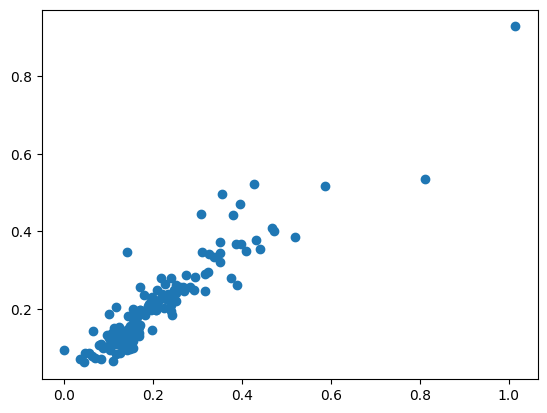

In [375]:
# Model evaluation
plt.scatter(y_test, y_pred_lasso_reg_test)

In [376]:
# Test and Train data after dropping previous top 5 features are
X_train_new5 = X_train.drop(['RoofStyle','Fireplaces','PavedDrive', 'FullBath', 'HalfBath'], axis=1)
X_test_new5 = X_test.drop(['RoofStyle','Fireplaces','PavedDrive', 'FullBath', 'HalfBath'], axis=1)

In [377]:
#Predictions based on Lasso+MinMax Scaler after dropping the previous top 5

# Pipeline creation and fitting
scaler_new5 = MinMaxScaler()
lasso_reg_new5 = Lasso(alpha=0.000005)
lasso_reg_new5_pipeline = make_pipeline(scaler, PolynomialFeatures(degree=2), lasso_reg_new5)
lasso_reg_new5_pipeline.fit(X_train_new5, y_train)

# Predictions
y_pred_lasso_new5_reg_train = lasso_reg_new5_pipeline.predict(X_train_new5)
y_pred_lasso_new5_reg_test = lasso_reg_new5_pipeline.predict(X_test_new5)

# Calculating R squared values
r2_lasso_new5_reg_train = r2_score(y_train,y_pred_lasso_new5_reg_train)
r2_lasso_new5_reg_test = r2_score(y_test,y_pred_lasso_new5_reg_test)

print ("Training R Squared:")
print (f"Lasso Regression(MinMax Scaler): {r2_lasso_new5_reg_train:.2f}")
print ("\nTesting R Squared:")
print (f"Lasso Regression(MinMax Scaler): {r2_lasso_new5_reg_test:.2f}")

Training R Squared:
Lasso Regression(MinMax Scaler): 0.84

Testing R Squared:
Lasso Regression(MinMax Scaler): 0.86


In [378]:
# New top 5 features are as below
# Checking for feature importance\co-efficients
res=pd.DataFrame(zip(X_train_new5.columns, lasso_reg_new5.coef_))
res = res.sort_values(by=1, ascending=False)
print(res.head())

               0         1
6       RoofMatl  0.036873
15    GarageCars  0.024683
12  KitchenAbvGr  0.010967
7      ExterQual  0.010634
11  BsmtFullBath  0.007858
